In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io

#### Let's load the data

In [2]:
train = scipy.io.loadmat('train_32x32.mat')
test  = scipy.io.loadmat('test_32x32.mat')

###### Let's see the keys and the dataset

In [3]:
train.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
train['__header__']

b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011'

In [5]:
train['X']

array([[[[ 33,  84,  19, ...,  92, 190, 216],
         [ 30,  76,  54, ...,  78, 188, 217],
         [ 38,  59, 110, ..., 101, 191, 212]],

        [[ 15,  86,  20, ...,  94, 205, 221],
         [ 23,  73,  52, ...,  82, 203, 222],
         [ 19,  66, 111, ..., 105, 206, 217]],

        [[ 15,  77,  25, ..., 114, 220, 226],
         [ 17,  78,  57, ..., 101, 218, 227],
         [ 19,  56, 116, ..., 125, 220, 221]],

        ..., 
        [[ 72,  90,  65, ..., 200, 229, 200],
         [ 65,  78, 144, ..., 201, 231, 199],
         [ 56,  69, 223, ..., 203, 224, 191]],

        [[ 82,  88,  78, ..., 192, 229, 193],
         [ 77,  77, 148, ..., 193, 229, 188],
         [ 57,  67, 218, ..., 195, 224, 182]],

        [[ 89,  88,  98, ..., 190, 229, 197],
         [ 79,  78, 158, ..., 191, 228, 189],
         [ 59,  66, 220, ..., 193, 223, 186]]],


       [[[ 28,  85,  21, ...,  92, 183, 204],
         [ 39,  77,  53, ...,  78, 182, 205],
         [ 35,  61, 110, ..., 103, 186, 202]],

    

In [6]:
train['y']

array([[1],
       [9],
       [2],
       ..., 
       [1],
       [6],
       [9]], dtype=uint8)

In [7]:
print("shape of images in train dataset is {} and target feature is {}".format(train['X'].shape, train['y'].shape))

shape of images in train dataset is (32, 32, 3, 73257) and target feature is (73257, 1)


In [8]:
print("shape of images in test dataset is {} ".format(test['X'].shape))

shape of images in test dataset is (32, 32, 3, 26032) 


#### Lets change the dimensions of an array

In [9]:
train['X'] = train['X'][np.newaxis,...]
train_data = np.swapaxes(train['X'],0,4).squeeze()

test['X'] = test['X'][np.newaxis,...]
test_data = np.swapaxes(test['X'],0,4).squeeze()

In [10]:
train_data.shape

(73257, 32, 32, 3)

----------------------------------------------

#### Let's see some images

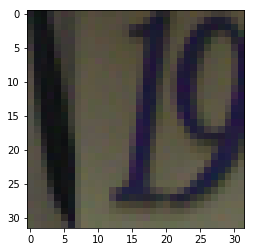

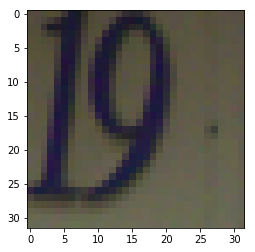

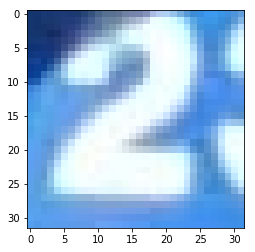

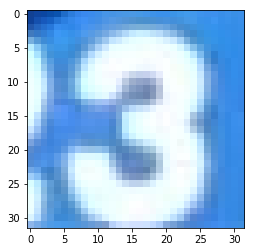

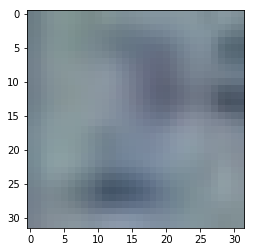

In [11]:
for i in range(5):
    plt.imshow(train_data[i],interpolation='nearest')
    plt.show()

###### Let's rescale the array

In [12]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [13]:
train_data /= 255.0
test_data /= 255.0

#### convert color image to grayscle

In [14]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [15]:
X_train = np.zeros((73257, 32, 32))
for i in range(train_data.shape[0]):
    X_train[i] = rgb2gray(train_data[i])

In [16]:
X_train.shape

(73257, 32, 32)

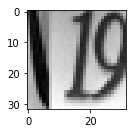

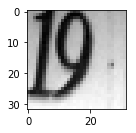

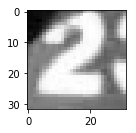

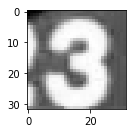

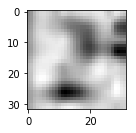

In [17]:
for i in range(5):
    plt.subplot(221)
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    plt.show()

In [18]:
X_test = np.zeros((26032, 32, 32))
for i in range(test_data.shape[0]):
    X_test[i] = rgb2gray(test_data[i])

In [19]:
X_train = X_train.reshape(X_train.shape[0],32, 32, 1)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

-------------------

---------------------------------------

In [25]:
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization

---------------------------------------

In [27]:
np.unique(train['y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [32]:
train['y'][:,0].shape

(73257,)

In [37]:
y_train = keras.utils.to_categorical(train['y'][:,0])[:,1:]
y_test = keras.utils.to_categorical(test['y'][:,0])[:,1:]

In [38]:
y_train[0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

##### Let's begin with the simple model for training

In [39]:
model = Sequential()
model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(32,32,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, (3,3), strides=(1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [42]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58605/58605 [==============================] - 178s - loss: 1.1945 - acc: 0.6167 - val_loss: 0.6691 - val_acc: 0.8209
Epoch 2/10
58605/58605 [==============================] - 131s - loss: 0.5844 - acc: 0.8344 - val_loss: 0.5588 - val_acc: 0.8483
Epoch 3/10
58605/58605 [==============================] - 131s - loss: 0.5052 - acc: 0.8565 - val_loss: 0.5111 - val_acc: 0.8555
Epoch 4/10
58605/58605 [==============================] - 131s - loss: 0.4565 - acc: 0.8691 - val_loss: 0.4822 - val_acc: 0.8614
Epoch 5/10
58605/58605 [==============================] - 132s - loss: 0.4168 - acc: 0.8809 - val_loss: 0.4635 - val_acc: 0.8678
Epoch 6/10
58605/58605 [==============================] - 130s - loss: 0.3808 - acc: 0.8909 - val_loss: 0.4307 - val_acc: 0.8763
Epoch 7/10
58605/58605 [==============================] - 131s - loss: 0.3522 - acc: 0.8973 - val_loss: 0.4060 - val_acc: 0.8842
Epoch 8/10
58605/58605 [=======================

In [52]:
score = model.evaluate(X_test, y_test, verbose=0)
print('loss:', score[0])
print('Test accuracy:', score[1])

loss: 0.429866914056
Test accuracy: 0.88233712354


In [43]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

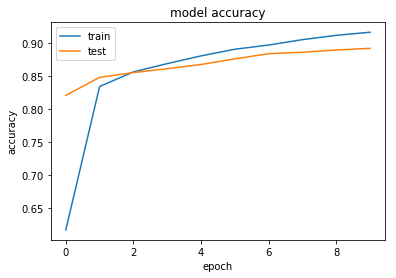

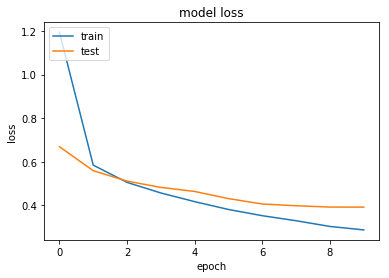

In [44]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### The accuracy is increasing but it also starts overfitting. 

--------------------------------

#### So, Let's add one more conv layer to the architecture and use regularization to deal with overfitting 

In [58]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(32,32,1)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))
model2.add(Conv2D(64, (3,3), strides=(1,1),padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3,3), strides=(1,1),padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model2.add(Dropout(0.3))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.3))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_24 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_25 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        36928     
__________

In [59]:
model2.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])

In [60]:
history2 = model2.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/5
58605/58605 [==============================] - 343s - loss: 1.5704 - acc: 0.4583 - val_loss: 0.6563 - val_acc: 0.8092
Epoch 2/5
58605/58605 [==============================] - 339s - loss: 0.7174 - acc: 0.7749 - val_loss: 0.4915 - val_acc: 0.8526
Epoch 3/5
58605/58605 [==============================] - 341s - loss: 0.5994 - acc: 0.8152 - val_loss: 0.4714 - val_acc: 0.8577
Epoch 4/5
58605/58605 [==============================] - 336s - loss: 0.5381 - acc: 0.8340 - val_loss: 0.4062 - val_acc: 0.8767
Epoch 5/5
58605/58605 [==============================] - 336s - loss: 0.5031 - acc: 0.8464 - val_loss: 0.3846 - val_acc: 0.8838


In [61]:
history2 = model2.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/5
58605/58605 [==============================] - 341s - loss: 0.4740 - acc: 0.8538 - val_loss: 0.3915 - val_acc: 0.8815
Epoch 2/5
58605/58605 [==============================] - 342s - loss: 0.4521 - acc: 0.8620 - val_loss: 0.3541 - val_acc: 0.8920
Epoch 3/5
58605/58605 [==============================] - 340s - loss: 0.4356 - acc: 0.8645 - val_loss: 0.3468 - val_acc: 0.8959
Epoch 4/5
58605/58605 [==============================] - 340s - loss: 0.4141 - acc: 0.8732 - val_loss: 0.3272 - val_acc: 0.9036
Epoch 5/5
58605/58605 [==============================] - 343s - loss: 0.3960 - acc: 0.8780 - val_loss: 0.3250 - val_acc: 0.9037


In [62]:
score2 = model2.evaluate(X_test, y_test, verbose=0)
print('loss:', score2[0])
print('Test accuracy:', score2[1])

loss: 0.363948386916
Test accuracy: 0.890980331899


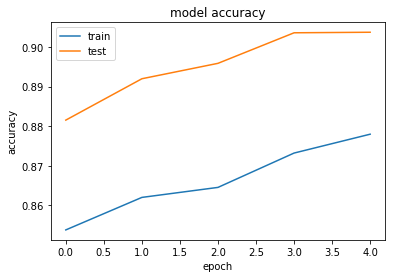

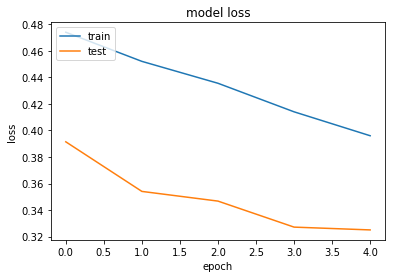

In [63]:
# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### The model has high validation accuracy than the training accuracy. So, there may be a possible chance that the training samples are more hard than the validation samples.
* Let's try to see the effect of decreasing learning rate, to check how it affects my performance

-----------------

#####  Let's try to use regilarization in very 1st architecture i.e. 'model' with decreasing the learning rates

In [65]:
model3 = Sequential()
model3.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(32,32,1)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.35))
model3.add(Conv2D(64, (3,3), strides=(1,1)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model3.add(Dropout(0.35))
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))
model3.add(Dropout(0.35))
model3.add(Dense(10))
model3.add(Activation('softmax'))
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_33 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_34 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
__________

In [68]:
from keras.optimizers import Adam

In [69]:
adam = Adam(lr=0.001)

In [70]:
model3.compile(loss='categorical_crossentropy', optimizer=adam , metrics=['accuracy'])

In [71]:
history3 = model3.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/5
58605/58605 [==============================] - 181s - loss: 1.4398 - acc: 0.5172 - val_loss: 0.7579 - val_acc: 0.7884
Epoch 2/5
58605/58605 [==============================] - 151s - loss: 0.8301 - acc: 0.7421 - val_loss: 0.5719 - val_acc: 0.8402
Epoch 3/5
58605/58605 [==============================] - 151s - loss: 0.7151 - acc: 0.7788 - val_loss: 0.5070 - val_acc: 0.8513
Epoch 4/5
58605/58605 [==============================] - 153s - loss: 0.6599 - acc: 0.7963 - val_loss: 0.4829 - val_acc: 0.8613
Epoch 5/5
58605/58605 [==============================] - 150s - loss: 0.6234 - acc: 0.8078 - val_loss: 0.4578 - val_acc: 0.8702


In [72]:
adam.lr = 0.0001

In [73]:
history3 = model3.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/5
58605/58605 [==============================] - 157s - loss: 0.5908 - acc: 0.8183 - val_loss: 0.4368 - val_acc: 0.8749
Epoch 2/5
58605/58605 [==============================] - 151s - loss: 0.5730 - acc: 0.8228 - val_loss: 0.4250 - val_acc: 0.8759
Epoch 3/5
58605/58605 [==============================] - 152s - loss: 0.5490 - acc: 0.8302 - val_loss: 0.4103 - val_acc: 0.8794
Epoch 4/5
58605/58605 [==============================] - 149s - loss: 0.5301 - acc: 0.8368 - val_loss: 0.4091 - val_acc: 0.8817
Epoch 5/5
58605/58605 [==============================] - 151s - loss: 0.5170 - acc: 0.8401 - val_loss: 0.4026 - val_acc: 0.8872


In [74]:
adam.lr = 0.00001

In [75]:
history3 = model3.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/5
58605/58605 [==============================] - 150s - loss: 0.4987 - acc: 0.8451 - val_loss: 0.3877 - val_acc: 0.8846
Epoch 2/5
58605/58605 [==============================] - 150s - loss: 0.4965 - acc: 0.8470 - val_loss: 0.3768 - val_acc: 0.8882
Epoch 3/5
58605/58605 [==============================] - 152s - loss: 0.4780 - acc: 0.8529 - val_loss: 0.3651 - val_acc: 0.8932
Epoch 4/5
58605/58605 [==============================] - 151s - loss: 0.4728 - acc: 0.8539 - val_loss: 0.3671 - val_acc: 0.8944
Epoch 5/5
58605/58605 [==============================] - 154s - loss: 0.4607 - acc: 0.8570 - val_loss: 0.3674 - val_acc: 0.8932


In [76]:
score3 = model3.evaluate(X_test, y_test, verbose=0)
print('loss:', score3[0])
print('Test accuracy:', score3[1])

loss: 0.396723083263
Test accuracy: 0.882529194837


##### May be the decreasing the learning rates will work.

------------------------------------

##### Lets try the first architecture i.e. 'model' with decaying learning rates

In [77]:
model4 = Sequential()
model4.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(32,32,1)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model4.add(Dropout(0.35))
model4.add(Conv2D(64, (3,3), strides=(1,1)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model4.add(Dropout(0.35))
model4.add(Flatten())
model4.add(Dense(256))
model4.add(Activation('relu'))
model4.add(Dropout(0.35))
model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_37 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_38 (Activation)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 64)          0         
__________

In [82]:
adam = Adam(decay=1e-6)
model4.compile(loss='categorical_crossentropy', optimizer=adam , metrics=['accuracy'])

In [83]:
history4 = model4.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/15
58605/58605 [==============================] - 162s - loss: 1.6382 - acc: 0.4394 - val_loss: 0.7190 - val_acc: 0.8028
Epoch 2/15
58605/58605 [==============================] - 162s - loss: 0.7158 - acc: 0.7828 - val_loss: 0.5233 - val_acc: 0.8535
Epoch 3/15
58605/58605 [==============================] - 160s - loss: 0.6005 - acc: 0.8159 - val_loss: 0.4627 - val_acc: 0.8667
Epoch 4/15
58605/58605 [==============================] - 160s - loss: 0.5426 - acc: 0.8341 - val_loss: 0.4306 - val_acc: 0.8787
Epoch 5/15
58605/58605 [==============================] - 160s - loss: 0.5036 - acc: 0.8460 - val_loss: 0.4086 - val_acc: 0.8839
Epoch 6/15
58605/58605 [==============================] - 161s - loss: 0.4750 - acc: 0.8543 - val_loss: 0.3786 - val_acc: 0.8912
Epoch 7/15
58605/58605 [==============================] - 162s - loss: 0.4511 - acc: 0.8619 - val_loss: 0.3719 - val_acc: 0.8952
Epoch 8/15
58605/58605 [=======================

In [84]:
score4 = model4.evaluate(X_test, y_test, verbose=0)
print('loss:', score4[0])
print('Test accuracy:', score4[1])

loss: 0.340593328987
Test accuracy: 0.903272894899


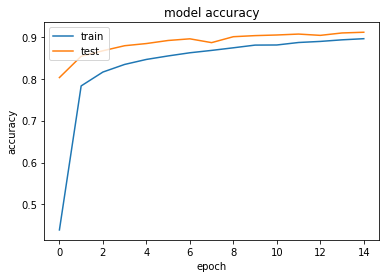

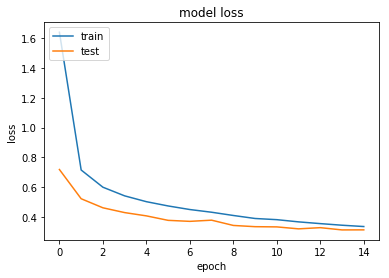

In [85]:
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### quite Satisfying, deacying the learning rate with that regularization works

-------------------------------------

#### Let's do some more experiment, Now with the 2nd architecture i.e. 'model2' with the decaying learning rates

In [93]:
model5 = Sequential()
model5.add(Conv2D(32, (3,3), strides=(1,1), padding='same', input_shape=(32,32,1)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model5.add(Dropout(0.35))
model5.add(Conv2D(64, (3,3), strides=(1,1),padding='same'))
model5.add(Activation('relu'))
model5.add(Conv2D(64, (3,3), strides=(1,1),padding='same'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2,2), padding='same', strides=(2,2)))
model5.add(Dropout(0.35))
model5.add(Flatten())
model5.add(Dense(256))
model5.add(Activation('relu'))
model5.add(Dropout(0.35))
model5.add(Dense(10))
model5.add(Activation('softmax'))
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
activation_49 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_50 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        36928     
__________

In [96]:
adam = Adam(decay=1e-6)
model5.compile(loss='categorical_crossentropy', optimizer=adam , metrics=['accuracy'])

In [97]:
history5 = model5.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/5
58605/58605 [==============================] - 459s - loss: 1.3627 - acc: 0.5383 - val_loss: 0.6117 - val_acc: 0.8183
Epoch 2/5
58605/58605 [==============================] - 350s - loss: 0.6598 - acc: 0.7955 - val_loss: 0.4710 - val_acc: 0.8608
Epoch 3/5
58605/58605 [==============================] - 349s - loss: 0.5510 - acc: 0.8307 - val_loss: 0.4134 - val_acc: 0.8760
Epoch 4/5
58605/58605 [==============================] - 352s - loss: 0.4903 - acc: 0.8484 - val_loss: 0.3703 - val_acc: 0.8890
Epoch 5/5
58605/58605 [==============================] - 354s - loss: 0.4438 - acc: 0.8640 - val_loss: 0.3429 - val_acc: 0.8980


In [98]:
history5 = model5.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58605/58605 [==============================] - 355s - loss: 0.4177 - acc: 0.8726 - val_loss: 0.3311 - val_acc: 0.9000
Epoch 2/10
58605/58605 [==============================] - 357s - loss: 0.4011 - acc: 0.8760 - val_loss: 0.3295 - val_acc: 0.9018
Epoch 3/10
58605/58605 [==============================] - 353s - loss: 0.3758 - acc: 0.8858 - val_loss: 0.3099 - val_acc: 0.9113
Epoch 4/10
58605/58605 [==============================] - 352s - loss: 0.3574 - acc: 0.8907 - val_loss: 0.3000 - val_acc: 0.9126
Epoch 5/10
58605/58605 [==============================] - 351s - loss: 0.3415 - acc: 0.8939 - val_loss: 0.2986 - val_acc: 0.9139
Epoch 6/10
58605/58605 [==============================] - 351s - loss: 0.3328 - acc: 0.8979 - val_loss: 0.2926 - val_acc: 0.9148
Epoch 7/10
58605/58605 [==============================] - 354s - loss: 0.3189 - acc: 0.9017 - val_loss: 0.2803 - val_acc: 0.9212
Epoch 8/10
58605/58605 [=======================

In [99]:
score5 = model5.evaluate(X_test, y_test, verbose=0)
print('loss:', score5[0])
print('Test accuracy:', score5[1])

loss: 0.296654294592
Test accuracy: 0.917025199754


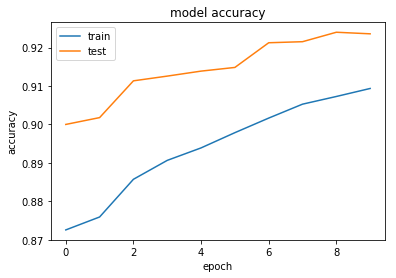

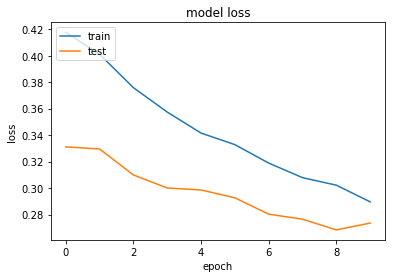

In [100]:
# summarize history for accuracy
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### decaying the learning rates also works here!!